# Linear Regression
### What is it?
With linear regression, we assume the predicted value is a linear combination of the features.

We express this as
$$ \hat{y}(w,x) = w_0 + w_1x_1 + \dots + w_px_p $$
where $\hat{y}$ is the predicted value, $x$ are our features, and $w$ are the weights of the features.

### Demo
Let's fit a simple linear regression model to some dummy data to see what it looks like.

In [17]:
# Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Text(0.5, 1.0, 'Example of (OLS) Linear Regression')

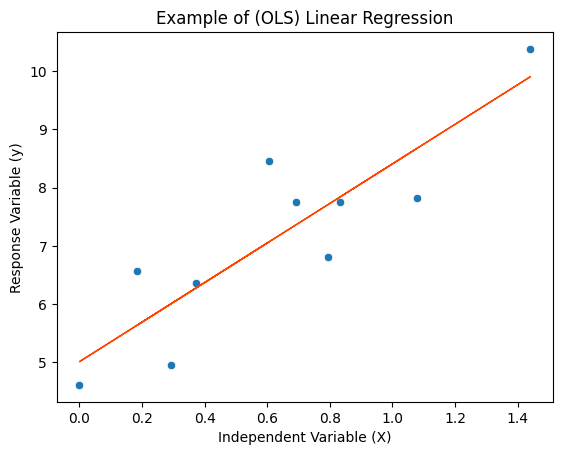

In [14]:
# Generate dummy data
np.random.seed(1)
X = 2 * np.random.rand(10, 1)
y = 4 + 3 * X + 3*np.random.rand(10, 1)

# Fit the model on the training data
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Plot the training data alongside the regression line
sns.scatterplot(x=X.flatten(), y=y.flatten())
plt.plot(X, reg.predict(X), color='orangered', linewidth=1)
plt.xlabel("Independent Variable (X)")
plt.ylabel("Response Variable (y)")
plt.title("Example of (OLS) Linear Regression")

# Types of Linear Regression Models
### Ordinary Least Squares (OLS)
OLS regression is the simplest type of linear regression in which we determine the weights by minimizing the sum of their squared residuals. That is,
\begin{align}
    \min_w  &= ||Xw - y||_2^2\\
            &= \sum_{i=1}^{n} (Xw_i - y_i)^2\\
            &= \sum_{i=1}^{n} (\hat{y_i} - y_i)^2.
\end{align}

### Ridge
Ridge regression imposes a penalty on the size of the weights (i.e. regularization). We instead minimize a penalized sum of squared residuals:
$$ \min_w ||Xw - y||_2^2 + \alpha||w||_2^2.$$

### Lasso
Lasso regression is particularly useful in estimating sparse weights, which means most of the weights will be zero. Hence, we penalize the least important feature more:
$$ \min_w \frac{1}{2N_{\text{samples}}}||Xw - y||_2^2 + \alpha||w||_1. $$

### Elastic-Net
Elastic-Net regression combines the penalities from Ridge and Lasso regression such that we learn a sparse model like Lasso while still maintaining the regularization properties of Ridge. Here we minimize
$$ \min_w \frac{1}{2N_{\text{samples}}}||Xw - y||_2^2 + \alpha\rho||w||_1 + \frac{\alpha(1-\rho)}{2}||w||_2^2. $$

## Working with Real Data
Let's try to apply linear regression to the [California Housing Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

We will try to predict house prices based on features such as the longitude, latitude, number of rooms, and population of the area.

In [19]:
# Load housing data and split it into train/test
data = fetch_california_housing()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Fit the models on the training data
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
elastic_net = linear_model.ElasticNet()
elastic_net.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = ols.predict(X_test)
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_pred))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))

Coefficient of determination (R^2): 0.60
Mean squared error (testing): 0.52
